In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("IMDB Top 250 Movies.csv")
data.head()

,rank,name,year,rating,genre,certificate,run_time,tagline,budget,box_office,casts,directors,writers
0,1,The Shawshank Redemption,1994,9.3,Drama,R,2h 22m,Fear can hold you prisoner. Hope can set you f...,25000000,28884504,"Tim Robbins,Morgan Freeman,Bob Gunton,William ...",Frank Darabont,"Stephen King,Frank Darabont"
1,2,The Godfather,1972,9.2,"Crime,Drama",R,2h 55m,An offer you can't refuse.,6000000,250341816,"Marlon Brando,Al Pacino,James Caan,Diane Keato...",Francis Ford Coppola,"Mario Puzo,Francis Ford Coppola"
2,3,The Dark Knight,2008,9.0,"Action,Crime,Drama",PG-13,2h 32m,Why So Serious?,185000000,1006234167,"Christian Bale,Heath Ledger,Aaron Eckhart,Mich...",Christopher Nolan,"Jonathan Nolan,Christopher Nolan,David S. Goyer"
3,4,The Godfather Part II,1974,9.0,"Crime,Drama",R,3h 22m,All the power on earth can't change destiny.,13000000,47961919,"Al Pacino,Robert De Niro,Robert Duvall,Diane K...",Francis Ford Coppola,"Francis Ford Coppola,Mario Puzo"
4,5,12 Angry Men,1957,9.0,"Crime,Drama",Approved,1h 36m,Life Is In Their Hands -- Death Is On Their Mi...,350000,955,"Henry Fonda,Lee J. Cobb,Martin Balsam,John Fie...",Sidney Lumet,Reginald Rose


In [3]:
data['budget'] = data['budget'].str.replace('$', '')
data['budget'] = data['budget'].str.extract('(\d+)')
data['budget'] = pd.to_numeric(data['budget'])
data['box_office'] = data['box_office'].str.replace('$', '')
data['box_office'] = data['box_office'].str.extract('(\d+)')
data['box_office'] = pd.to_numeric(data['box_office'])
data = data.dropna()

## First Line Plot

In [4]:
def first_plot(data):
    data_temp = data.loc[(data['genre'] == "Drama") |(data['genre'] == "Drama,Romance")]
    avg_rating = pd.DataFrame(data_temp.groupby(['genre', 'year'])['rating'].mean())
    avg_rating = avg_rating.reset_index()
    # Get a list of unique genres
    genres = avg_rating['genre'].unique()

    fig = plt.figure(figsize=(12, 6))
    # Create a figure and axis
    ax = fig.subplots()

    # Iterate through each genre and plot its data
    for genre in genres:
        genre_data = avg_rating[avg_rating['genre'] == genre]
        ax.plot(genre_data['year'], genre_data['rating'], label=genre)

    # Set the x-axis and y-axis labels
    ax.set_xlabel('Year')
    ax.set_ylabel('Rating')
    ax.set_title('Trend of Average Rating By Genre Over Time')
    # Add a legend
    ax.legend()

    # Show the plot
    plt.show()

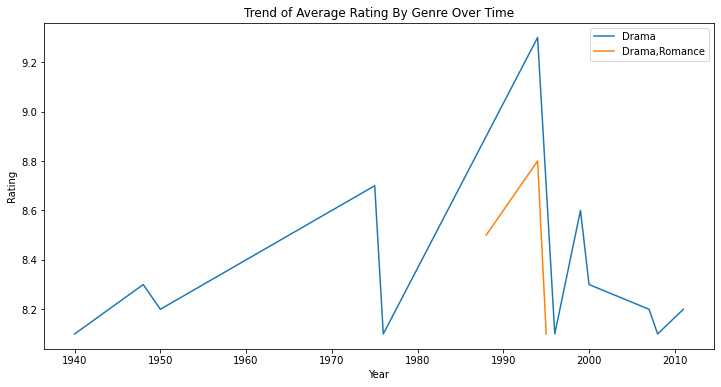

In [5]:
first_plot(data)

## Two More Plots

In [6]:
def second_plot_choice_1(data):
    x = data['budget']
    y = data['rating']
    x =pd.to_numeric(x)

    fig, ax = plt.subplots(figsize=(12, 6))

    # Fit a linear regression model
    m, b = np.polyfit(x, y, 1)

    # Create a scatter plot of the data
    ax.scatter(x, y, s=25)

    # Plot the regression line
    ax.plot(x, m*x + b, color='red', alpha=0.5)

    # Add labels and a title
    ax.set_xlabel('Budget')
    ax.set_ylabel('Rating')
    ax.set_title('Regression Plot Between Budget & Rating')
    plt.show()

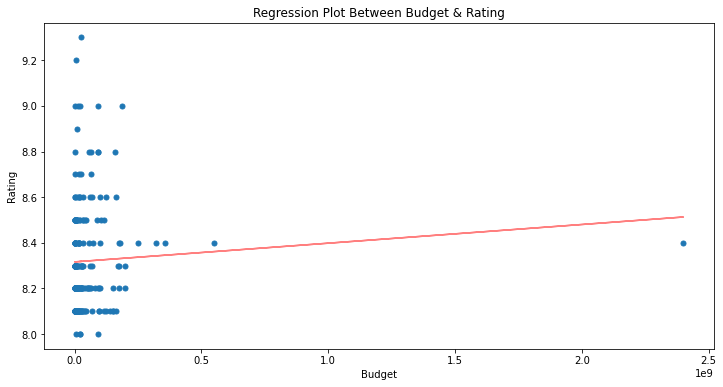

In [7]:
second_plot_choice_1(data)

In [8]:
def second_plot_choice_2(data):
    top_writers = pd.DataFrame(data.groupby(['writers'])['box_office'].sum())
    top_writers = top_writers.reset_index()
    top_writers.sort_values(by=['box_office'], ascending=False, inplace=True)
    top_writers = top_writers.head(5)
    # Set the plot size
    fig, ax = plt.subplots(figsize=(15, 6))

    # Create a bar chart of the data
    plt.bar(top_writers['writers'], top_writers['box_office'])

    # Add labels and a title
    # Add labels and a title
    ax.set_xlabel('Writers')
    ax.set_ylabel('Box Office Value')
    ax.set_title('Top 5 writers by total box office value')
    ax.set_xticklabels(top_writers['writers'], rotation=45)
    # Show the plot
    plt.show()

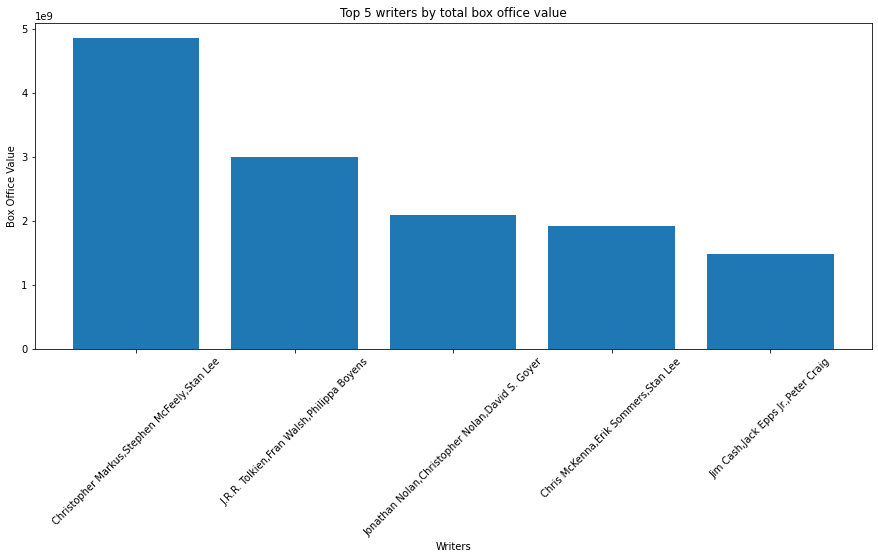

In [9]:
second_plot_choice_2(data)